# HDDT The SQL tables and introduction #

The Historical Data Digital Toolkit (HDDT) comprises of data extracted from one or more ordered datasets (which can be data sourced from several archives). Mulitple donor datasets must share a common data field to enable datasets from multiple donors to be linked together (combined). For this project the common data field is a person's name. Data extracted from the RAI, QFHS and my own research (at RAI and Friends House, London), produced records where each record provided data about a person. All of the persons in this project were members of the Centres for the Emergence of the Discipline of Anthropology in Britain 1830 to 1870 (the CEDA).

Collected data (after cleaning and combining) was then rendered as CSV sheets and these were used to creatre SQL database tables. 

The person columns 'Family Name' and 'First Names' in the database are common to all datatables. Therefore the person table is the 'master' table (all persons recorded have a unique ID, and authority index concerns were resolved by accepting the RAI dataset as the authority index). Attributable data was attached to the person table (such as date of birth).

Other related data items are captured in relatable tables and all relatable tables have a shared structure ('id', 'name', 'notes'). 

m2m tables were then built linking the person data table to related datatables. m2m tables allow for many to many realtionships. 

The m2m_person_ceda table includes the attributable data 'first_year' and 'last_year'.

The person_person table will generate social network graphs, all other m2m_tables will generate bipartite graphs (bigraphs).

<img src="ERD.png"> 

## **6 CEDA:** ##

1. QCA Quaker Committee on the Aborigines, 31 members.
2. APS Aborigines Protection Society, 1171 members.
3. ESL Ethnological Society of London, 748 members.
4. ASL Anthropological Society of London, 1334 members.
5. LAS London Anthropological Society,
   *(No members included in this project)*
6. AI Anthropological Institute. 610 members.


## **514 groups:** ##

- address (0)
- ceda (6)
- club (68)
- location (83)
- occupation (93)
- person (3095)
- suffix (155)
- religion (4) Only one group is present, 1 = Quaker.
- society (260)

## **PERSONS IN GROUPS 12097** ##
 
- m2m_person_address (0)
- m2m_person_ceda (3894) 
- m2m_person_club (323) 
- m2m_person_location (2061) 
- m2m_person_occupation (1883)
- m2m_person_person (2099)
- m2m_person_religion (593) 
- m2m_person_society (1238) 
- m2m_person_suffix (1351) *Not used in this project*


## Part One - shows the structure and dimensions of all SQL tables ##

## Part Two - shows all SQL tables rendered in Gephi format ##

In [28]:
import pandas as pd

import csv

# First call the sql tables as they appear in the database (Part One)

ceda = pd.read_csv ('ceda_202107151833.csv')
club = pd.read_csv ('club_202107151833.csv')
location = pd.read_csv ('location_202107151833.csv')
person_ceda = pd.read_csv ('m2m_person_ceda_202107151835.csv')
person_club = pd.read_csv ('m2m_person_club_202107151835.csv')
person_location = pd.read_csv ('m2m_person_location_202107151835.csv')
person_occupation = pd.read_csv ('m2m_person_occupation_202107151836.csv')
person_person = pd.read_csv('m2m_person_person_202107151836.csv')
person_religion = pd.read_csv ('m2m_person_religion_202107151836.csv')
person_society = pd.read_csv ('m2m_person_society_202107151836.csv')
occupation = pd.read_csv ('occupation_202107151834.csv')
person = pd.read_csv ('person_202107151834.csv')
religion = pd.read_csv ('religion_202107151834.csv')
society = pd.read_csv('society_202107151834.csv')

# next call the sql tables rendered in Gephi format (Part Two)

# call all Names

gephi_all_names = pd.read_csv ('vw_2_all_bipartite_memberships_202107121854.csv')
gephi_names_notceda = pd.read_csv ('vw_2_all_bipartite_memberships_xceda_202107121855.csv')

# Then call all Tuples (Source and Target)

gephi_person_ceda = pd.read_csv ('vw_2_ceda_membership_202107121855.csv')
gephi_person_club = pd.read_csv ('vw_2_club_membership_202107121855.csv')
gephi_person_location = pd.read_csv ('vw_2_location_membership_202107121856.csv')
gephi_person_occupation = pd.read_csv ('vw_2_occupation_membership_202107121856.csv')
gephi_person_person = pd.read_csv('vw_2_person_person_relationships_202107161545.csv')
gephi_person_religion = pd.read_csv ('vw_2_religion_membership_202107121856.csv')
gephi_person_society = pd.read_csv ('vw_2_society_membership_202107121858.csv')

import matplotlib.pyplot as plt

import numpy as np

## Part One ##

## HDDT Tables ## 

### The following table shows the dimesions of all tables in the SQL database ###


| Table | Rows | Columns
| --- | --- | --- |
| ceda | 6 | 1 |
| person_ceda | 3894 | 4 |
| club | 68 |1 |
| person_club | 323 | 2 |
| location   | 83 | 1 | 
| person_location | 2061 | 2 |
| occupation | 93 | 1 |
| person_occupation | 1883 | 2 |
| person | 3095 | 7 |
| person_person | 2099 | 3 |
| religion | 4 | 1 |
| person_religion | 593 | 3 |
| society | 260 | 1 |
| person_society | 1238 | 2|

Note:

Bipartite relationships = 9992 (+2099 person_person relationships = 12091 total relationships)

In [29]:
ceda

,id,name,notes
0,1,QCA,NaN
1,2,APS,NaN
2,3,ESL,NaN
3,4,ASL,NaN
4,5,LAS,NaN
5,6,AI,NaN


In [30]:
person_ceda

,id,person_id,ceda_id,first_year,last_year,notes
0,1,5,3,1844,1844,NaN
1,2,7,3,1844,1844,NaN
2,3,8,3,1858,1871,NaN
3,4,12,3,1860,1871,NaN
4,5,14,3,1843,1845,NaN
...,...,...,...,...,...,...
3889,4096,3415,2,1839,1850,NaN
3890,4097,3416,2,1861,1862,NaN
3891,4098,3417,2,1853,1856,NaN
3892,4099,3418,2,1840,1840,NaN


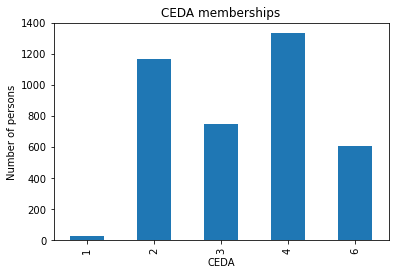

In [31]:
person_ceda.groupby('ceda_id')['person_id'].nunique().plot(kind='bar')
plt.title ("CEDA memberships")
plt.xlabel ("CEDA")
plt.ylabel ("Number of persons")
plt.show()

## CEDA memberships ##

- 1 QCA
- 2 APS
- 3 ESL
- 4 ASL
- 6 AI

Note - LAS data has not been collected by the RAI archivists

In [32]:
club

,id,name,notes
0,2,Athenaeum Club,NaN
1,3,Marlborough Club,NaN
2,4,Carlton Club,NaN
3,5,Oriental Club,NaN
4,6,National Club,NaN
...,...,...,...
63,65,Royal Albert Yacht Club,NaN
64,66,Berwickshire Naturalists Field Club,NaN
65,67,Indian Club,NaN
66,68,Ad Eundem,NaN


In [33]:
person_club

,id,person_id,club_id
0,1,7,2
1,2,22,2
2,3,33,2
3,4,33,3
4,5,33,4
...,...,...,...
318,356,2163,5
319,357,2196,2
320,358,2214,4
321,359,2223,2


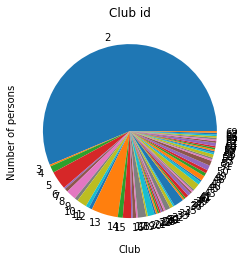

In [34]:
person_club.groupby('club_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Club id")
plt.xlabel ("Club")
plt.ylabel ("Number of persons")
plt.show()

## Club memberships ##

The Athaneum Club membrship exceeds that of all other clubs combined.

Note - ignore clubs outside of the top 5?

In [35]:
location

,id,name,notes
0,1,London,NaN
1,3,country,NaN
2,4,Africa,NaN
3,5,America,NaN
4,6,Scotland,NaN
...,...,...,...
78,80,Madagascar,NaN
79,81,Ecuador,NaN
80,82,Seychelles,NaN
81,83,Panama,NaN


In [36]:
person_location

,id,person_id,location_id
0,1,1,1
1,2,3,3
2,3,4,4
3,4,6,1
4,5,8,1
...,...,...,...
2056,2257,2255,1
2057,2259,2258,3
2058,2260,2259,83
2059,2261,2260,84


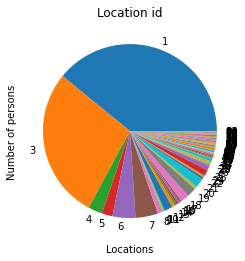

In [37]:
person_location.groupby('location_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Location id")
plt.xlabel ("Locations")
plt.ylabel ("Number of persons")
plt.show()

## Location memberships ##

Note - ignore location memberships outside of the top 15?

In [38]:
occupation

,id,name,notes
0,1,literary,NaN
1,3,medical,NaN
2,4,armed services,NaN
3,5,political,NaN
4,6,church,NaN
...,...,...,...
88,90,farmer,NaN
89,91,clockmaker,NaN
90,92,plant collector,NaN
91,93,private means,NaN


In [39]:
person_occupation

,id,person_id,occupation_id
0,1,1,1
1,2,3,3
2,3,3,4
3,4,5,5
4,5,8,3
...,...,...,...
1878,2122,2252,3
1879,2123,2253,3
1880,2124,2254,3
1881,2125,2255,16


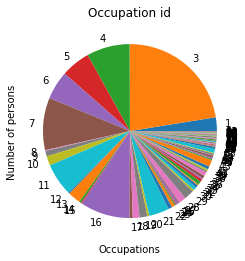

In [40]:
person_occupation.groupby('occupation_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Occupation id")
plt.xlabel ("Occupations")
plt.ylabel ("Number of persons")
plt.show()

## Occupation memberships ##

A spread of occupations is evident. 

Note - Ignore occupations outside of the top 10?

In [41]:
person

,id,family_name,first_names,title,gender_id,birth_year,death_year,data_source_id,notes
0,1,A Beckett,Arthur William,NaN,1.0,1844.0,1909.0,1,"17 King Street, S. James's, S.W. 88 St James's..."
1,3,Adam,Andrew Mercer,NaN,1.0,NaN,NaN,1,"Boston, Lincolnshire"
2,4,Adam,H R,NaN,1.0,NaN,NaN,1,"Old Calabar, W. Africa"
3,5,Adam,William,NaN,1.0,NaN,NaN,1,NaN
4,6,Adams,Henry John,NaN,1.0,NaN,NaN,1,"14 Thornhill Square, N."
...,...,...,...,...,...,...,...,...,...
3090,3415,Wright,x,Rev Dr,NaN,NaN,NaN,3,NaN
3091,3416,Wrigley,W,NaN,NaN,NaN,NaN,3,NaN
3092,3417,Yates,James,Rev,NaN,NaN,NaN,3,NaN
3093,3418,Young,John,NaN,NaN,NaN,NaN,3,NaN


In [42]:
person_person

,id,relationship_type_id,person1_id,person2_id
0,1,1,23,2346
1,2,1,2264,2346
2,3,1,2265,2547
3,4,1,2545,2547
4,5,1,2546,2547
...,...,...,...,...
2094,4373,3,2494,2496
2095,4374,3,2495,2579
2096,4376,3,2867,2868
2097,4378,3,2869,2871


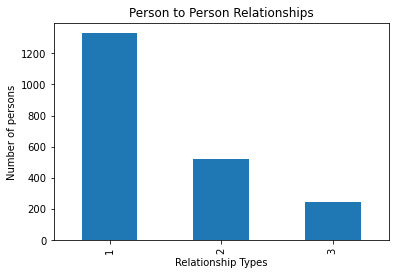

In [43]:
person_person.groupby('relationship_type_id')['id'].nunique().plot(kind='bar')
plt.title ("Person to Person Relationships")
plt.xlabel ("Relationship Types")
plt.ylabel ("Number of persons")
plt.show()

## Person to person relationships (Quakers only) ##

### 1 = Distant relations, 2 = Close relations, 3 = Immediate relations ###

In [44]:
religion

,id,name,notes
0,1,Quaker,NaN
1,2,Methodist,NaN
2,3,Jew,NaN
3,4,CoE,NaN


In [45]:
person_religion

,id,person_id,religion_id,confirmed,notes
0,1,2233,1,0,Multiple possibilities
1,3,2211,1,0,Multiple possibilities
2,4,2208,1,0,Multiple possibilities
3,5,2108,1,1,"Edward T. Wakefield (1821-1896), of Portadown,..."
4,14,1744,1,0,"Possibly John Ross (1798-1863), of Chatteris, ..."
...,...,...,...,...,...
588,693,2876,1,1,"Joshua Wilson (1806-1877), merchant, ship and ..."
589,694,2877,1,1,"Firth Woodhead (1811-1874), grocer and tea dea..."
590,695,2878,1,1,"William Woolston (1817-1898), of Wellingborough"
591,696,2879,1,1,"Francis Wright (1774-1850), tanner, chemist, a..."


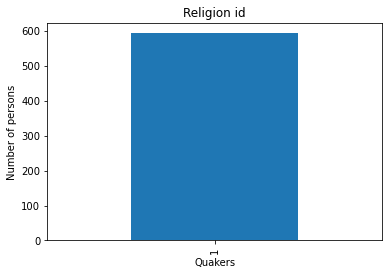

In [46]:
person_religion.groupby('religion_id')['person_id'].nunique().plot(kind='bar')
plt.title ("Religion id")
plt.xlabel ("Quakers")
plt.ylabel ("Number of persons")
plt.show()

## Religion memberships (Quakers) ##

In [47]:
society

,id,name,notes
0,2,Royal College of Surgeons,NaN
1,3,Pathological Society of London,NaN
2,4,Harveian Society,NaN
3,5,Medical Society of London,NaN
4,6,Medical and Chirurgical Society of London,NaN
...,...,...,...
255,257,Philomatic Society of Paris,NaN
256,258,Bacup Natural History Society,NaN
257,259,Saint Petersburg Academy of Sciences,NaN
258,260,Russian Geographic Society,NaN


In [48]:
person_society

,id,person_id,society_id
0,1,8,2
1,2,8,3
2,3,8,5
3,4,8,6
4,5,11,7
...,...,...,...
1233,1383,2245,108
1234,1384,2245,23
1235,1385,2252,27
1236,1386,2258,201


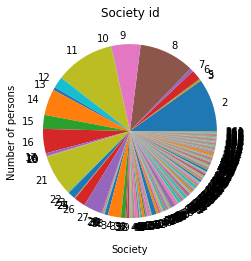

In [49]:
person_society.groupby('society_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Society id")
plt.xlabel ("Society")
plt.ylabel ("Number of persons")
plt.show()

## Society memberships ##

Note - exclude societies where membership is less than 5 members?

# Part Two - All SQL relatable tables rendered in Gephi format #

## Rendering data in Gephi format ##

JNB uses NetworkX to generate GexF files for data to be used to produce graph files for network analysis in Gephi. Two files must be generated:

1. A file of 'Names' listing the names of all nodes to be used in a graph (These are 'persons' and all entities in related data tables, such as 'occupations'). Each row in a Names table must be unique and referenced in the 'Tuples' (or edges) table.

Note - For Names to be Gephi compliant the headers 'family_name' and 'first_names' must be combined into a single header  -'Names'.

2. A 'Tuples' (or edges) table made up of two columns of Names where the two Names are related. The first column must be headed 'Source' and the second column 'Target'.

'Names' and 'Tuples' tables can also have an 'id' column (if not then Gephi will assign one).

Note - Because 'Names', 'Source' and 'Target' are language names in Gephi capitalisation is important.

SQL views have been written to convert the data tables into Gephi standard.

In [50]:
gephi_all_names

,ID,Source,Target
0,1,Arthur William A Beckett,ASL
1,1,Arthur William A Beckett,London
2,1,Arthur William A Beckett,literary
3,3,Andrew Mercer Adam,ASL
4,3,Andrew Mercer Adam,armed services
...,...,...,...
9987,3415,x Wright,APS
9988,3416,W Wrigley,APS
9989,3417,James Yates,APS
9990,3418,John Young,APS


In [51]:
gephi_names_notceda

,ID,Source,Target
0,1,Arthur William A Beckett,London
1,1,Arthur William A Beckett,literary
2,3,Andrew Mercer Adam,armed services
3,3,Andrew Mercer Adam,country
4,3,Andrew Mercer Adam,medical
...,...,...,...
6093,2876,Joshua Wilson,Quaker
6094,2877,F Woodhead,Quaker
6095,2878,W Woolston,Quaker
6096,2879,Francis Wright,Quaker


In [52]:
gephi_person_ceda

,ID,Source,Target
0,5,William Adam,ESL
1,7,William (1) Adams,ESL
2,8,William (2) Adams,ESL
3,12,Louis Agassiz,ESL
4,14,Augustine Aglio,ESL
...,...,...,...
3889,3415,x Wright,APS
3890,3416,W Wrigley,APS
3891,3417,James Yates,APS
3892,3418,John Young,APS


In [53]:
gephi_person_club

,ID,Source,Target
0,7,William (1) Adams,Athenaeum Club
1,22,Rutherford Alcock,Athenaeum Club
2,33,William Amhurst Tyssen Amhurst,Athenaeum Club
3,33,William Amhurst Tyssen Amhurst,Marlborough Club
4,33,William Amhurst Tyssen Amhurst,Carlton Club
...,...,...,...
318,2163,James Whishaw,Oriental Club
319,2196,S W D Williams,Athenaeum Club
320,2214,William Smith Windham,Carlton Club
321,2223,Henry Drummond Wolff,Athenaeum Club


In [54]:
gephi_person_location

,ID,Source,Target
0,1,Arthur William A Beckett,London
1,3,Andrew Mercer Adam,country
2,4,H R Adam,Africa
3,6,Henry John Adams,London
4,8,William (2) Adams,London
...,...,...,...
2056,2255,James A Youl,London
2057,2258,Robert Younge,country
2058,2259,Arthur de Zeltner,Panama
2059,2260,x Zohrab,Armenia


In [55]:
gephi_person_occupation

,ID,Source,Target
0,1,Arthur William A Beckett,literary
1,3,Andrew Mercer Adam,medical
2,3,Andrew Mercer Adam,armed services
3,5,William Adam,political
4,8,William (2) Adams,medical
...,...,...,...
1878,2252,W Holt Yates,medical
1879,2253,James Yearsley,medical
1880,2254,Stephen Yeldham,medical
1881,2255,James A Youl,business


In [56]:
gephi_person_person

,id,Source,Target
0,1,William Aldam,x Fox
1,2,William Jun Aldam,x Fox
2,3,Frederick Alexander,R D Alexander
3,4,G W Alexander,R D Alexander
4,5,Henry Alexander,R D Alexander
...,...,...,...
2094,4373,Alfred Waterhouse,R Waterhouse
2095,4374,Mary Waterhouse,Paul Bevan
2096,4376,Lucy Westcombe,Thomas Westcombe
2097,4378,Benjamin Wheeler,Samuel Wheeler


In [57]:
gephi_person_religion

,ID,Source,Target
0,2233,William Spicer Wood,Quaker
1,2211,William Wilson,Quaker
2,2208,James Wilson,Quaker
3,2108,E T Wakefield,Quaker
4,1744,John Ross,Quaker
...,...,...,...
588,2876,Joshua Wilson,Quaker
589,2877,F Woodhead,Quaker
590,2878,W Woolston,Quaker
591,2879,Francis Wright,Quaker


In [58]:
gephi_person_society

,ID,Source,Target
0,8,William (2) Adams,Royal College of Surgeons
1,8,William (2) Adams,Pathological Society of London
2,8,William (2) Adams,Medical Society of London
3,8,William (2) Adams,Medical and Chirurgical Society of London
4,11,William Adlam,Somersetshire Archaeological and Natural Histo...
...,...,...,...
1233,2245,William Cort Wright,Manchester Literary and Philosophical Society
1234,2245,William Cort Wright,Chemical Society
1235,2252,W Holt Yates,Royal College of Physicians
1236,2258,Robert Younge,York Philosphical Society
